In [1]:
from stock_methods import get_data_with_labels
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

2012-01-01
2012-06-21
2012-12-04
2013-05-16
2013-10-17
2014-03-28
2014-09-11
2015-02-26
2015-08-06
2016-01-27
2016-07-08
2016-12-01
2017-03-31
2017-07-20
2017-11-02
2018-02-27
2018-06-20
2018-09-28
2019-01-08
2019-04-22
2019-07-31
2019-11-08
2020-02-20
2020-05-18
2020-08-24
2020-12-01
2021-03-16


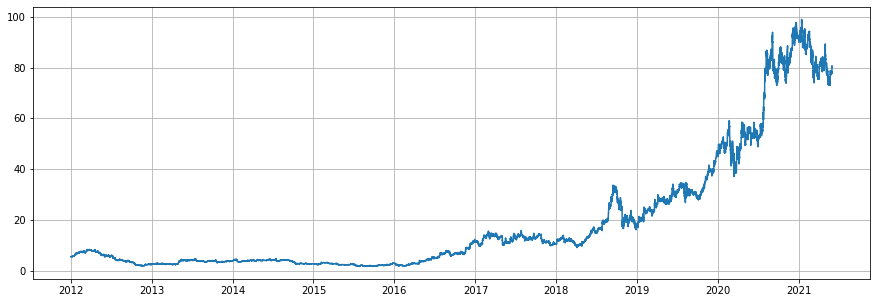

In [2]:
data_stock, barriers, bunch_of_features = get_data_with_labels("AMD")

In [3]:
data_stock

,volume,vw,open,close,high,low,number
2012-01-03 12:00:00,1100.0,5.5000,5.500,5.50,5.500,5.500,6
2012-01-03 13:00:00,24951.0,5.5243,5.480,5.54,5.540,5.480,29
2012-01-03 14:00:00,1359139.0,5.5509,5.400,5.55,5.590,5.400,3115
2012-01-03 15:00:00,2822896.0,5.5226,5.550,5.52,5.580,5.450,5652
2012-01-03 16:00:00,1179854.0,5.4913,5.520,5.49,5.525,5.470,2604
...,...,...,...,...,...,...,...
2021-05-28 18:00:00,2854229.0,80.4431,80.460,80.54,80.600,80.235,22901
2021-05-28 19:00:00,5946872.0,80.2899,80.545,80.10,80.550,80.010,46519
2021-05-28 20:00:00,212540.0,80.0727,80.080,80.02,80.120,80.010,672
2021-05-28 21:00:00,30953.0,80.0539,80.010,80.02,80.080,80.010,181


In [4]:
barriers

,days_passed,price,vert_barrier,top_barrier,bottom_barrier,out
2012-01-03 14:00:00,1,5.55,2012-01-04 14:00:00,5.614373,5.507085,-1
2012-01-03 15:00:00,2,5.52,2012-01-04 15:00:00,5.625644,5.449571,0
2012-01-03 16:00:00,3,5.49,2012-01-04 16:00:00,5.589851,5.423432,0
2012-01-03 17:00:00,4,5.485,2012-01-04 17:00:00,5.569527,5.428649,0
2012-01-03 18:00:00,5,5.46,2012-01-04 18:00:00,5.538203,5.407864,0
...,...,...,...,...,...,...
2021-05-28 18:00:00,33178,80.54,NaN,82.16468,79.45688,None
2021-05-28 19:00:00,33179,80.1,NaN,81.719027,79.020649,None
2021-05-28 20:00:00,33180,80.02,NaN,81.577089,78.981941,None
2021-05-28 21:00:00,33181,80.02,NaN,81.514567,79.023622,None


In [5]:
bunch_of_features

,volume_1,price_spread_1,close_loc_1,close_change_1,volume_2,price_spread_2,close_loc_2,close_change_2,volume_3,price_spread_3,...,close_loc_20,close_change_20,volume_40,price_spread_40,close_loc_40,close_change_40,volume_60,price_spread_60,close_loc_60,close_change_60
2012-01-03 12:00:00,1100.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 13:00:00,24951.0,0.060,0.000000,0.0400,26051.0,0.060,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 14:00:00,1359139.0,0.190,0.210526,0.0100,1384090.0,0.190,0.210526,0.0100,1385190.0,0.190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 15:00:00,2822896.0,0.130,0.461538,-0.0300,4182035.0,0.190,0.368421,-0.0300,4206986.0,0.190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 16:00:00,1179854.0,0.055,0.636364,-0.0300,4002750.0,0.130,0.692308,-0.0300,5361889.0,0.190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28 18:00:00,2854229.0,0.365,0.164384,0.0753,6305926.0,0.565,0.460177,0.0753,9638082.0,0.565,...,0.163690,0.0753,95816076.0,3.62,0.151934,0.0753,140671016.0,4.2535,0.129305,0.0753
2021-05-28 19:00:00,5946872.0,0.540,0.833333,-0.4400,8801101.0,0.590,0.847458,-0.4400,12252798.0,0.790,...,0.294643,-0.4400,101761177.0,3.62,0.273481,-0.4400,146587314.0,4.2535,0.232750,-0.4400
2021-05-28 20:00:00,212540.0,0.110,0.909091,-0.0800,6159412.0,0.540,0.981481,-0.0800,9013641.0,0.590,...,0.318452,-0.0800,101942980.0,3.62,0.295580,-0.0800,146771164.0,4.2535,0.251558,-0.0800
2021-05-28 21:00:00,30953.0,0.070,0.857143,0.0000,243493.0,0.110,0.909091,0.0000,6190365.0,0.540,...,0.318452,0.0000,101910866.0,3.62,0.295580,0.0000,146796670.0,4.2535,0.251558,0.0000


In [6]:
dropna_barriers = barriers.dropna()
data = bunch_of_features[60:-13].assign(out=dropna_barriers[58:-2].out)
data.dropna(inplace=True)
out = data.out
out=out.astype('int')
data.drop('out', axis=1, inplace=True)
data

,volume_1,price_spread_1,close_loc_1,close_change_1,volume_2,price_spread_2,close_loc_2,close_change_2,volume_3,price_spread_3,...,close_loc_20,close_change_20,volume_40,price_spread_40,close_loc_40,close_change_40,volume_60,price_spread_60,close_loc_60,close_change_60
2012-01-10 13:00:00,15004.0,0.04,0.250000,0.0200,15304.0,0.04,0.250000,0.0200,16742.0,0.11,...,0.033333,0.0200,35540898.0,0.3300,0.030303,0.0200,55633821.0,0.33,0.030303,0.0200
2012-01-10 14:00:00,1393823.0,0.10,0.450000,0.0250,1408827.0,0.10,0.450000,0.0250,1409127.0,0.10,...,0.125000,0.0250,36908307.0,0.3900,0.115385,0.0250,57002693.0,0.39,0.115385,0.0250
2012-01-10 15:00:00,1349910.0,0.05,0.800000,-0.0050,2743733.0,0.10,0.500000,-0.0050,2758737.0,0.10,...,0.138889,-0.0050,38253617.0,0.3900,0.128205,-0.0050,56993464.0,0.39,0.128205,-0.0050
2012-01-10 16:00:00,2673112.0,0.08,0.093750,0.0225,4023022.0,0.09,0.194444,0.0225,5416845.0,0.10,...,0.076389,0.0225,40925629.0,0.3900,0.070513,0.0225,56843680.0,0.39,0.070513,0.0225
2012-01-10 17:00:00,1272293.0,0.04,0.000000,0.0275,3945405.0,0.10,0.000000,0.0275,5295315.0,0.10,...,0.000000,0.0275,42179422.0,0.3900,0.000000,0.0275,56936119.0,0.39,0.000000,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27 21:00:00,184685.0,0.20,0.600000,0.0100,2016125.0,0.45,0.311111,0.0100,8719596.0,0.71,...,0.231481,0.0100,106037820.0,1.9335,0.243082,0.0100,138453969.0,1.97,0.238579,0.0100
2021-05-27 22:00:00,26429.0,0.15,0.000000,0.0000,211114.0,0.27,0.444444,0.0000,2042554.0,0.45,...,0.231481,0.0000,98149117.0,1.6400,0.286585,0.0000,138473493.0,1.97,0.238579,0.0000
2021-05-27 23:00:00,28922.0,0.24,0.000000,0.1200,55351.0,0.27,0.000000,0.1200,240036.0,0.27,...,0.120370,0.1200,89665965.0,1.6400,0.213415,0.1200,138500251.0,1.97,0.177665,0.1200
2021-05-28 08:00:00,3535.0,0.30,0.266667,-0.0800,32457.0,0.30,0.266667,-0.0800,58886.0,0.30,...,0.155340,-0.0800,80472879.0,1.4600,0.171233,-0.0800,138449378.0,1.97,0.218274,-0.0800


In [7]:
y_test = out[-100:]
x_test = data[-100:]

y_train = out[:-100]
x_train = data[:-100]

In [8]:
from catboost import CatBoostClassifier

param_grid = []

model = CatBoostClassifier(iterations=20)

model.fit(x_train, y_train)
y_catboost_predictions = model.predict(x_test)

Learning rate set to 0.5
0:	learn: 1.0655005	total: 85.4ms	remaining: 1.62s
1:	learn: 1.0534122	total: 103ms	remaining: 929ms
2:	learn: 1.0463682	total: 125ms	remaining: 706ms
3:	learn: 1.0405486	total: 143ms	remaining: 572ms
4:	learn: 1.0378181	total: 163ms	remaining: 490ms
5:	learn: 1.0358401	total: 182ms	remaining: 424ms
6:	learn: 1.0335737	total: 201ms	remaining: 372ms
7:	learn: 1.0315986	total: 225ms	remaining: 338ms
8:	learn: 1.0294870	total: 245ms	remaining: 300ms
9:	learn: 1.0280557	total: 267ms	remaining: 267ms
10:	learn: 1.0244681	total: 288ms	remaining: 236ms
11:	learn: 1.0224168	total: 308ms	remaining: 205ms
12:	learn: 1.0203923	total: 329ms	remaining: 177ms
13:	learn: 1.0189070	total: 348ms	remaining: 149ms
14:	learn: 1.0175549	total: 366ms	remaining: 122ms
15:	learn: 1.0155594	total: 386ms	remaining: 96.4ms
16:	learn: 1.0145036	total: 406ms	remaining: 71.6ms
17:	learn: 1.0126111	total: 429ms	remaining: 47.7ms
18:	learn: 1.0104302	total: 448ms	remaining: 23.6ms
19:	learn: 

In [9]:
catboost_conf_mx = confusion_matrix(y_test, y_catboost_predictions[:,0])
catboost_conf_mx

array([[13,  7,  3],
       [15, 31,  6],
       [ 7, 14,  4]])

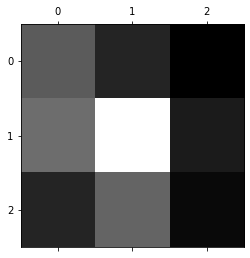

In [10]:
plt.matshow(catboost_conf_mx, cmap=plt.cm.gray)
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, class_weight='balanced_subsample', criterion="entropy")
clf.fit(x_train, y_train)
y_RFC_predictions = clf.predict(x_test)

In [12]:
RFC_conf_mx = confusion_matrix(y_test, y_RFC_predictions)
RFC_conf_mx

array([[10,  4,  9],
       [15, 28,  9],
       [ 6, 10,  9]])

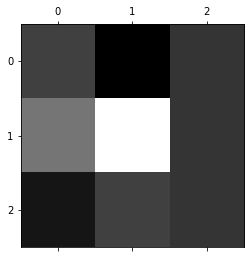

In [13]:
plt.matshow(RFC_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_params = {
    'n_estimators': randint(4,2000),
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    'min_samples_split': uniform(0.01, 0.199),
    'criterion': ['gini', 'entropy']
}

rfc = RandomForestClassifier()

clf = RandomizedSearchCV(rfc, model_params, n_iter=30)

test = clf.fit(x_train, y_train)

search.best_params

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_xgboost_predictions = model.predict(x_test)

In [ ]:
xgboost_conf_mx = confusion_matrix(y_test, y_xgboost_predictions)
xgboost_conf_mx

In [ ]:
plt.matshow(xgboost_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=4000,
            learning_rate=0.03)
clf.fit(x_train, y_train)

y_lgb_predictions=clf.predict(x_test)

In [ ]:
lgb_conf_mx = confusion_matrix(y_test, y_lgb_predictions)
lgb_conf_mx

In [ ]:
plt.matshow(lgb_conf_mx, cmap=plt.cm.gray)
plt.show()